CATE estimators using IPW and DR pseudo-outcomes

The outcome is simulated as: $ Y = \frac{1}{d}\sum_{i=1}^{d}X_{i} + \epsilon, \text{where}\ \epsilon \sim N(0,0.5)$

The treatment assignment is simulated following: $ logit(pt) = \frac{1}{d}\sum_{i=1}^{d}X_{i}$

Covariates: $X \sim N(0,I), \text{where}\ I$ is the identity matrix

In this simulation we plot the RMSE for increasing sample 

In [1]:
import numpy as np
from src.synthetic_data import ex1_sample
from src.cate_learners import PseudoDRLearner,PseudoIPWLearner
from src.plots import create_boxplot
import numpy as np

'''
Simulation setup
'''
seed = 1 # for reproducibility
r = 50 # number of simulations
d = 5 # number of covariates
d_t = 5 # number of covariates used for treatment assigment
d_y = 5 # number of covariates used for outcome assignment 
k = 2 # number of folds for cross-fitting 
sample_size = [1000,2500,5000] # sample size used for training
num_test = 1000 # sample size used for testing
np.random.seed(seed)

In [2]:
'''
Run simulation
'''
dr_cate = []
ipw_cate = []
true_ite = []
for i in range(len(sample_size)):
    print(f"Running simulation using sample size = {sample_size[i]}...")
    dr_cate_i = np.zeros([r,num_test])
    ipw_cate_i = np.zeros([r,num_test])
    ite_i = np.zeros([r,num_test])
    for j in range(r):
        data_train = ex1_sample(sample_size[i],d,d_t,d_y)
        data_test = ex1_sample(num_test,d,d_t,d_y)

        dr_model = PseudoDRLearner(k,seed)
        dr_model.train(data_train['x'],data_train['y'],data_train['t'])
        dr_cate_i[j,:] = dr_model.predict(data_test['x'])
        ite_i[j,:] = data_test['ite']

        ipw_model = PseudoIPWLearner(k,seed)
        ipw_model.train(data_train['x'],data_train['y'],data_train['t'])
        ipw_cate_i[j,:] = ipw_model.predict(data_test['x'])

    dr_cate.append(dr_cate_i)
    ipw_cate.append(ipw_cate_i)
    true_ite.append(ite_i)

Running simulation using sample size = 1000...
Running simulation using sample size = 2500...
Running simulation using sample size = 5000...


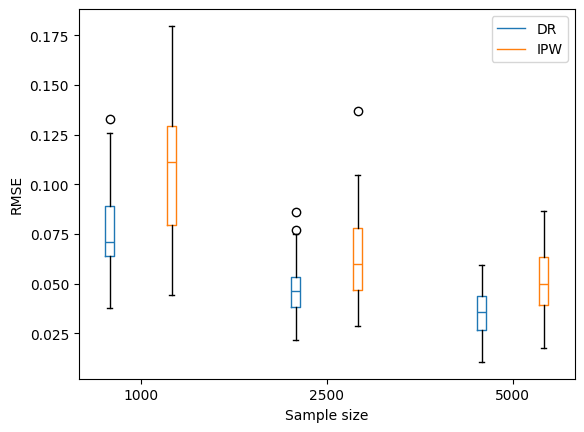

In [3]:
'''
Plot RMSE of CATE
'''
cate_dr = np.zeros([len(sample_size),r])
cate_ipw = np.zeros([len(sample_size),r])
cate_outcome = np.zeros([len(sample_size),r])
for i in range(len(sample_size)):
    cate_dr[i,:] = np.sqrt(np.mean(np.square(dr_cate[i]-true_ite[i]),1))
    cate_ipw[i,:] = np.sqrt(np.mean(np.square(ipw_cate[i]-true_ite[i]),1))

CATE_est_names = ["DR","IPW"]
CATE_est = [cate_dr,cate_ipw]
create_boxplot(CATE_est,CATE_est_names,sample_size,x_lab="Sample size",y_lab="RMSE",ref=None)

